In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ubi = r"C:\Users\randy\EBAC.PRACTICAS\Bases.docs\Mall_Customers.csv"

In [2]:
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv(ubi)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Tomamos las dos ultimas columnas o variables del DF
fields =  data.iloc[:,[3,4]].values
print(fields)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
wcss = [] # Se encargara en calcular la inercia, o la distancia cuadratica de los centerides

for index in range(1,11): # Es decir vamos aprobar hasta 11 clusters para observar que es lo que mas nos combiene manejar
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2) # Aplicacion de ARGTM, y damos el primer parametro N_. Y init para el iniciador, y una semilla Random.state para generar los valores de formaleatorizada.
    kmeans.fit(fields) # toma nuestra lista de valores para indetificar a que especifico grupo va a pertenecer cada grupo.

    wcss.append(kmeans.inertia_) # Esto guarda los errores que se cometen en cada grupo y esa distacnia que hya de manera cuadratica de cada centriode.


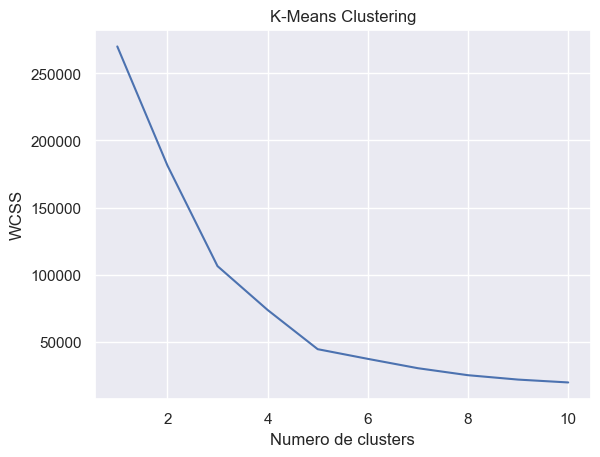

In [7]:
# Graficacion del "Codo de JAMBU"

sns.set()
plt.plot(range(1,11), wcss)
plt.title("K-Means Clustering")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS") # WEIGHTED CLUSTERS SUM OF SQUATRES
plt.show()

# NUESTRO GRAFICO DE CODO DE JAMBU INDICA QUE TENEMOS 5 CLUSTERS

In [8]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42) # llamamos a KMEANS con el numero especifico de 5 clusters
# inicializamos con INIT y el algoritmos "K-Means++" 
# Y el numero aleatorio de semilla RANDOM_STATE = 42


# PREDICCION de cada grupo que toca o de donde debe de tocar este algoritmo
cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [9]:
cluster_values

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

# Como se interpreta esto ¿?

In [10]:
# Significa que el primer resultado que en este caso es el 4 seria el primero renglon de la lista del DF
# O el primero renglon del DF donde en este caso lo clasifico en el 4
# y en el segundo renglon lo clasifico con el cluster 2

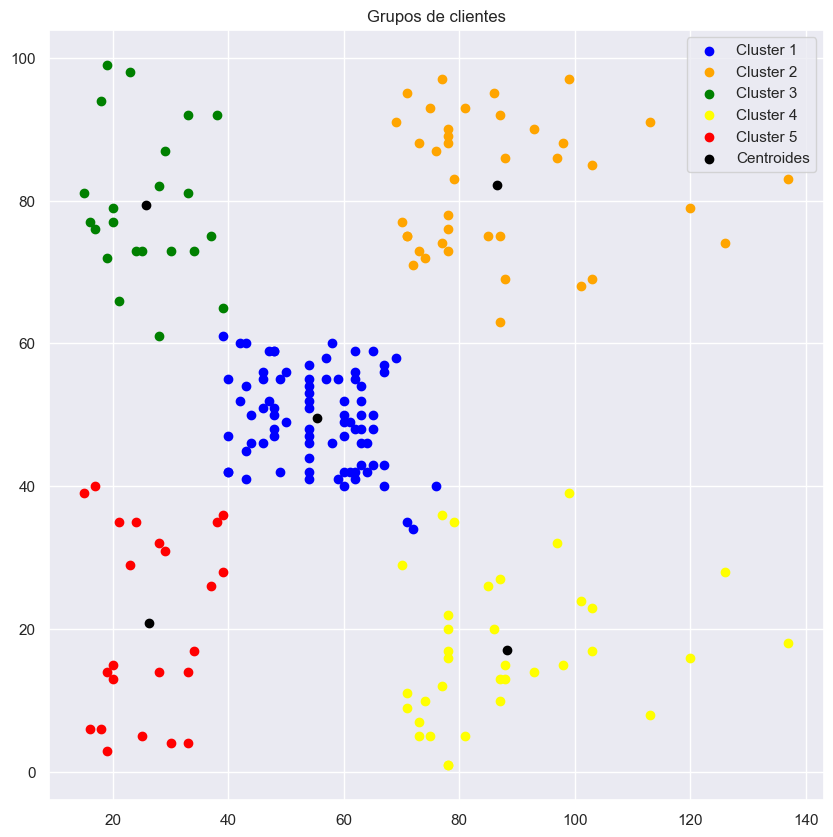

In [11]:
plt.figure(figsize= (10,10)) # Creamos una imagen
plt.scatter(fields[cluster_values==0,0], fields[cluster_values==0,1], c="blue", label = "Cluster 1") # Graficamos todos los cluster del valor 0 y los puntos del primer cluster de color azul
plt.scatter(fields[cluster_values==1,0], fields[cluster_values==1,1], c="orange", label = "Cluster 2") # Graficamos todos los cluster del valor 1 y los puntos del primer cluster de color azul
plt.scatter(fields[cluster_values==2,0], fields[cluster_values==2,1], c="green", label = "Cluster 3") # Graficamos todos los cluster del valor 2 y los puntos del primer cluster de color verde
plt.scatter(fields[cluster_values==3,0], fields[cluster_values==3,1], c="yellow", label = "Cluster 4") # Graficamos todos los cluster del valor 3 y los puntos del primer cluster de color amarillo
plt.scatter(fields[cluster_values==4,0], fields[cluster_values==4,1], c="red", label = "Cluster 5") # Graficamos todos los cluster del valor 4 y los puntos del primer cluster de color red

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = "black", label="Centroides") # Mostramos de negro todos los Centroides de los Clusters
plt.title("Grupos de clientes")
plt.xlabel = "Annual income"
plt.ylabel = "Spending Score"
plt.legend()

# Criterio de Silueta ("Silhouette")

### Funciona dando un indicador lo mas cercano a 1

In [12]:
from sklearn import datasets
from sklearn.metrics import silhouette_score

In [13]:
X = data.iloc[:, [3,4]].to_numpy() # Toamos nuestro data con el comando iloc sobre toodos los renglones y le indicamos los indices de la columa 3 y 4 que se refieren a las ultima columnas y las comvertimos a un objeto NUMPY
for j in range(2,12):  # Por cada j en el rango de 2 hasta 12 "MINIMO, CLUSTERS DE 2" 
    kmeans = KMeans(n_clusters = j, random_state= 42) # creamos una variable que guarde en numero de clusters y cargamos el algoritmo con el numero de clsuters que se va a mover con una semilla de 42 para que nos de los mismos resultados
    kmeans.fit_predict(X) # Hacemos pa prediccion cargando .predict. para ese grupo de X para nuestra lista de valores
    # Calculamos el Score de Silueta 
    score = silhouette_score(X, kmeans.labels_, metric="euclidean") # variable, llamamos a SILHUOETTE_SCORE le ponemos X donde vaya tomando las etiquetas de KMEANS. labels y le ponemos como metrica que sea las distancias EUCLIDIANAS
    print("Score Silhouette;" , "k = ", j, ":", score) # Que ponga el score 

Score Silhouette; k =  2 : 0.2968969162503008
Score Silhouette; k =  3 : 0.46761358158775435
Score Silhouette; k =  4 : 0.4931963109249047
Score Silhouette; k =  5 : 0.553931997444648
Score Silhouette; k =  6 : 0.53976103063432
Score Silhouette; k =  7 : 0.5288104473798049
Score Silhouette; k =  8 : 0.45481197931195283
Score Silhouette; k =  9 : 0.4561091950997367
Score Silhouette; k =  10 : 0.4410568674364981
Score Silhouette; k =  11 : 0.4489710248005492


# Que pasa si metemos mas de dos columnas ¿?

### Lo que vamos a hacer ahora es todo lo que hicimos pero con tres columnas
### Donde aplicaremos PCA donde las tres columnas las remplazaremos por 2 Columnas que las representen
### y sobre esas columnas cargaremos el mismo algoritmo que acabamos de crear

In [14]:
# Algoritmo KMEANS aplicado a 3 columnas de nuestra base original
# Bajo una transformacion de PCA

fields2 = data.iloc[:,[2,3,4]].values # Variable, tomamos nuestro data con el comando .iloc donde tomamos las columas 2,3,4 y solo sus valores con el comando .values
print(fields2)

[[ 19  15  39]
 [ 21  15  81]
 [ 20  16   6]
 [ 23  16  77]
 [ 31  17  40]
 [ 22  17  76]
 [ 35  18   6]
 [ 23  18  94]
 [ 64  19   3]
 [ 30  19  72]
 [ 67  19  14]
 [ 35  19  99]
 [ 58  20  15]
 [ 24  20  77]
 [ 37  20  13]
 [ 22  20  79]
 [ 35  21  35]
 [ 20  21  66]
 [ 52  23  29]
 [ 35  23  98]
 [ 35  24  35]
 [ 25  24  73]
 [ 46  25   5]
 [ 31  25  73]
 [ 54  28  14]
 [ 29  28  82]
 [ 45  28  32]
 [ 35  28  61]
 [ 40  29  31]
 [ 23  29  87]
 [ 60  30   4]
 [ 21  30  73]
 [ 53  33   4]
 [ 18  33  92]
 [ 49  33  14]
 [ 21  33  81]
 [ 42  34  17]
 [ 30  34  73]
 [ 36  37  26]
 [ 20  37  75]
 [ 65  38  35]
 [ 24  38  92]
 [ 48  39  36]
 [ 31  39  61]
 [ 49  39  28]
 [ 24  39  65]
 [ 50  40  55]
 [ 27  40  47]
 [ 29  40  42]
 [ 31  40  42]
 [ 49  42  52]
 [ 33  42  60]
 [ 31  43  54]
 [ 59  43  60]
 [ 50  43  45]
 [ 47  43  41]
 [ 51  44  50]
 [ 69  44  46]
 [ 27  46  51]
 [ 53  46  46]
 [ 70  46  56]
 [ 19  46  55]
 [ 67  47  52]
 [ 54  47  59]
 [ 63  48  51]
 [ 18  48  59]
 [ 43  48 

# PCA
### para reducir las 3 columnas a 2 columnas

In [15]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2) # Vairabl, aplicando decompisition, en su funcion PCA donde el mnumero de componentes es igual a 2
pca.fit(fields2) # hacemos un fit aplicado a nuestra base nombrada fields2
fields2 = pca.transform(fields2) # vamos a llammar a nuestra base para que tome la transformacion
fields2

array([[-3.18705078e+01, -3.30014253e+01],
       [ 7.63396908e-01, -5.68438653e+01],
       [-5.74087256e+01, -1.31229362e+01],
       [-2.16989648e+00, -5.34779049e+01],
       [-3.21749197e+01, -3.03870050e+01],
       [-2.17827777e+00, -5.22265808e+01],
       [-5.90660565e+01, -9.54170669e+00],
       [ 1.23693261e+01, -6.16176843e+01],
       [-6.63156568e+01, -3.21359934e+00],
       [-5.65677534e+00, -4.72664534e+01],
       [-5.82366179e+01, -9.13375312e+00],
       [ 1.46202592e+01, -6.21072940e+01],
       [-5.51612126e+01, -1.00779778e+01],
       [-4.30660584e-03, -5.01134367e+01],
       [-5.27647474e+01, -1.16804199e+01],
       [ 1.94563480e+00, -5.15231943e+01],
       [-3.45062349e+01, -2.37600734e+01],
       [-7.30573032e+00, -4.35158724e+01],
       [-4.12574933e+01, -1.64734320e+01],
       [ 1.61888268e+01, -5.82998775e+01],
       [-3.27403118e+01, -2.13349462e+01],
       [-9.82702739e-01, -4.44533143e+01],
       [-5.78102821e+01, -1.86854579e+00],
       [-1.

In [16]:
wcss2 = [] # Se encargara en calcular la inercia, o la distancia cuadratica de los centerides

for i in range(1,11): # Es decir vamos aprobar hasta 11 clusters para observar que es lo que mas nos combiene manejar
    kmeans = KMeans(n_clusters = i, init = "k-means++", max_iter =300, n_init=10, random_state = 0) # Aplicacion de ARGTM, y damos el primer parametro N_. Y init para el iniciador, y una semilla Random.state para generar los valores de formaleatorizada.
    kmeans.fit(fields2) # toma nuestra lista de valores para indetificar a que especifico grupo va a pertenecer cada grupo.

    wcss2.append(kmeans.inertia_) # Esto guarda los errores que se cometen en cada grupo y esa distacnia que hya de manera cuadratica de cada centriode.

In [17]:
print(len(wcss2))

10


In [18]:
print(len(range(1,11)))

10


TypeError: 'str' object is not callable

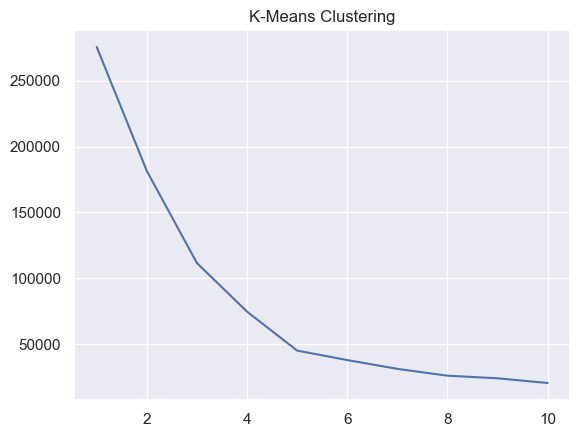

In [19]:
# Graficacion del "Codo de JAMBU"
sns.set()
plt.plot(range(1,11), wcss2)
plt.title("K-Means Clustering")
plt.xlabel("Numero de clusters")
plt.ylabel("WCSS") # WEIGHTED CLUSTERS SUM OF SQUATRES
plt.show()

In [20]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42) # llamamos a KMEANS con el numero especifico de 5 clusters
# inicializamos con INIT y el algoritmos "K-Means++" 
# Y el numero aleatorio de semilla RANDOM_STATE = 42


# PREDICCION de cada grupo que toca o de donde debe de tocar este algoritmo
cluster_values = kmeans.fit_predict(fields2)
print(cluster_values)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


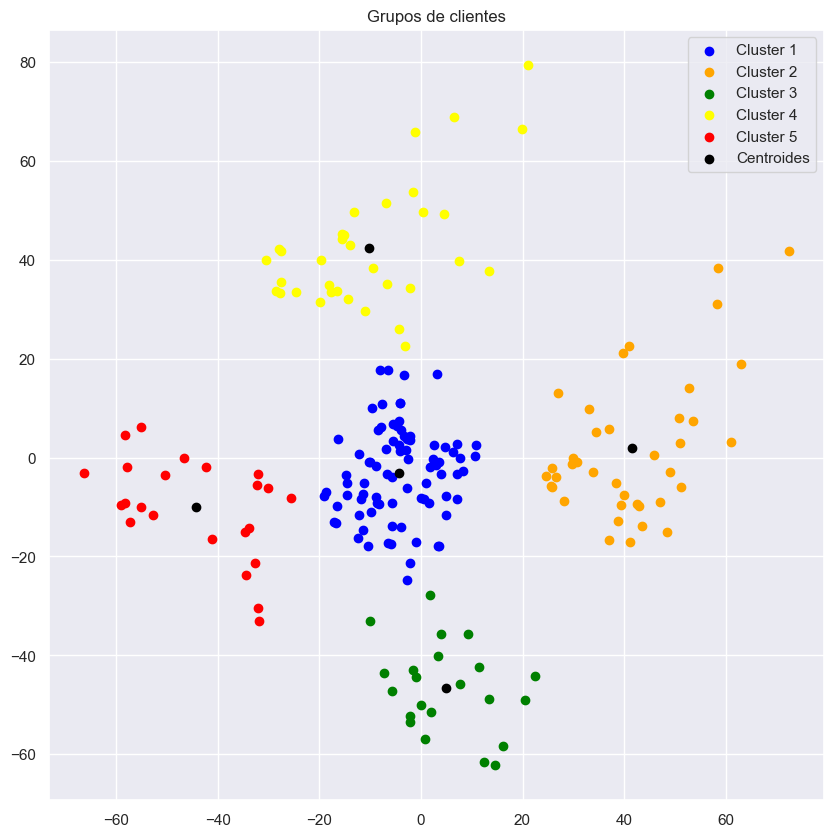

In [22]:
plt.figure(figsize= (10,10)) # Creamos una imagen
plt.scatter(fields2[cluster_values==0,0], fields2[cluster_values==0,1], c="blue", label = "Cluster 1") # Graficamos todos los cluster del valor 0 y los puntos del primer cluster de color azul
plt.scatter(fields2[cluster_values==1,0], fields2[cluster_values==1,1], c="orange", label = "Cluster 2") # Graficamos todos los cluster del valor 1 y los puntos del primer cluster de color azul
plt.scatter(fields2[cluster_values==2,0], fields2[cluster_values==2,1], c="green", label = "Cluster 3") # Graficamos todos los cluster del valor 2 y los puntos del primer cluster de color verde
plt.scatter(fields2[cluster_values==3,0], fields2[cluster_values==3,1], c="yellow", label = "Cluster 4") # Graficamos todos los cluster del valor 3 y los puntos del primer cluster de color amarillo
plt.scatter(fields2[cluster_values==4,0], fields2[cluster_values==4,1], c="red", label = "Cluster 5") # Graficamos todos los cluster del valor 4 y los puntos del primer cluster de color red

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c = "black", label="Centroides") # Mostramos de negro todos los Centroides de los Clusters
plt.title("Grupos de clientes")
plt.xlabel = "Annual income"
plt.ylabel = "Spending Score"
plt.legend()